#Week-5

In [9]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [10]:
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)

In [11]:
X,y=X.to_numpy(),y.to_numpy()

In [12]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)

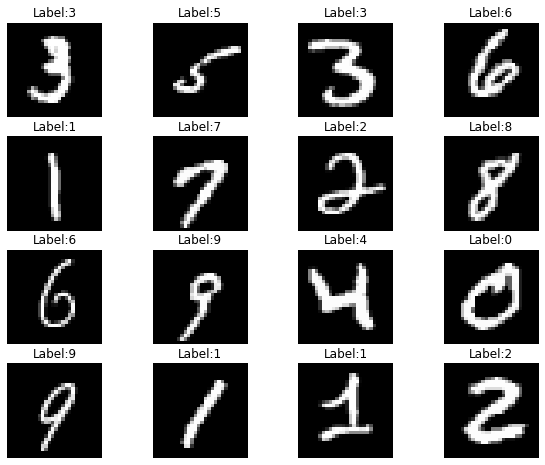

In [15]:
num_images=16
factor=int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(10,8))
idx_offset=10
for i in range(factor):
  index=idx_offset+i*factor
  for j in range(factor):
    ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
    ax[i,j].set_title('Label:{0}'.format((y[index+j])))
    ax[i,j].set_axis_off()

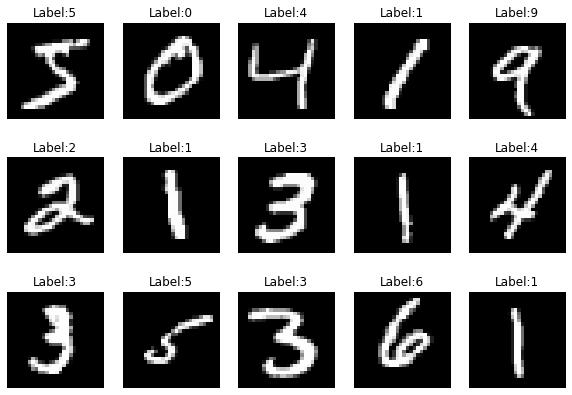

In [15]:
fig=plt.figure(figsize=(10,7))
for i in range(15):
  ax=fig.add_subplot(3,5,i+1)
  ax.imshow(X[i].reshape(28,28),cmap='gray')
  ax.set_title('Label:{0}'.format(y[i]))
  plt.axis('off')

In [21]:
import seaborn as sns

In [20]:
x_train, x_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

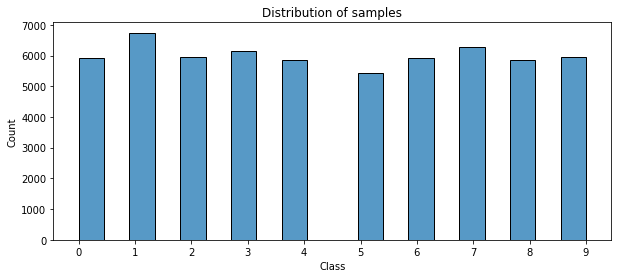

In [31]:
plt.figure(figsize=(10,4))
sns.histplot(data=np.int8(y_train),binwidth=0.45,bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of samples')
plt.show()

In [32]:
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))

# find indices of digit 0 image
indx_0 = np.where(y_train=='0')

y_train_0[indx_0]=1
indx_0=np.where(y_test=='0')
y_test_0[indx_0]=1

In [41]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_validate, cross_val_predict
from pprint import pprint
bin_clf=Perceptron(max_iter=100, random_state=1729)
scores=cross_validate(bin_clf, x_train, y_train_0, cv=5,
                          scoring=['precision','recall','f1'],
                        return_estimator=True)


In [36]:
pprint(scores)

{'estimator': [Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729)],
 'fit_time': array([0.9353025 , 1.92346358, 1.36457443, 1.21986628, 1.56097317]),
 'score_time': array([0.04106855, 0.04007149, 0.04051161, 0.04044151, 0.04012489]),
 'test_f1': array([0.95238095, 0.91666667, 0.94915254, 0.94117647, 0.95091763]),
 'test_precision': array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345]),
 'test_recall': array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439])}


In [37]:
best_est=scores['estimator'][0]

In [43]:
from sklearn.model_selection import GridSearchCV

In [45]:
?GridSearchCV

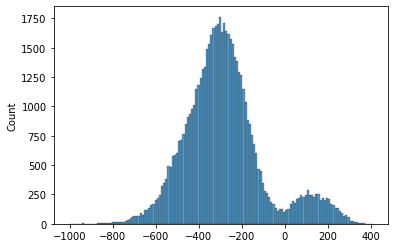

In [46]:
bin_clf= Perceptron(random_state=1729)
bin_clf.fit(x_train,y_train_0)
y_scores = bin_clf.decision_function(x_train)
sns.histplot(np.sort(y_scores))
plt.show()

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_0, y_scores, pos_label=1)

In [50]:
precision[:-1],recalls[:-1]

(array([0.12831178, 0.12829289, 0.12829567, ..., 1.        , 1.        ,
       1.        ]), array([1.00000000e+00, 9.99831167e-01, 9.99831167e-01, ...,
       5.06500084e-04, 3.37666723e-04, 1.68833361e-04]))

In [1]:
text_documents = ['You must have heard “Apple a day keeps the doctor away” but what does that mean? Well, it has a very straightforward and precise meaning that eating apples maintains good health and acts as a bodyguard to save your body from diseases.',
                  'The proverb was first published in print in 1866 and over 150 years later, a medical journal has used the excuse of April Fool’s Day to publish a study that questions – seriously – If this wisdom really does keep the doctor away. ',
                  'British apples are one of the nations best loved fruit and according to British Apples, we consume around 122,000 tonned of them each year.',
                  'But what are the health benefits, and do they really keep the doctor away?']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
c_vect=CountVectorizer()

In [3]:
X_c=c_vect.fit_transform(text_documents)

In [4]:
X_c.shape

(4, 84)

In [5]:
c_vect.vocabulary_

{'000': 0,
 '122': 1,
 '150': 2,
 '1866': 3,
 'according': 4,
 'acts': 5,
 'and': 6,
 'apple': 7,
 'apples': 8,
 'april': 9,
 'are': 10,
 'around': 11,
 'as': 12,
 'away': 13,
 'benefits': 14,
 'best': 15,
 'body': 16,
 'bodyguard': 17,
 'british': 18,
 'but': 19,
 'consume': 20,
 'day': 21,
 'diseases': 22,
 'do': 23,
 'doctor': 24,
 'does': 25,
 'each': 26,
 'eating': 27,
 'excuse': 28,
 'first': 29,
 'fool': 30,
 'from': 31,
 'fruit': 32,
 'good': 33,
 'has': 34,
 'have': 35,
 'health': 36,
 'heard': 37,
 'if': 38,
 'in': 39,
 'it': 40,
 'journal': 41,
 'keep': 42,
 'keeps': 43,
 'later': 44,
 'loved': 45,
 'maintains': 46,
 'mean': 47,
 'meaning': 48,
 'medical': 49,
 'must': 50,
 'nations': 51,
 'of': 52,
 'one': 53,
 'over': 54,
 'precise': 55,
 'print': 56,
 'proverb': 57,
 'publish': 58,
 'published': 59,
 'questions': 60,
 'really': 61,
 'save': 62,
 'seriously': 63,
 'straightforward': 64,
 'study': 65,
 'that': 66,
 'the': 67,
 'them': 68,
 'they': 69,
 'this': 70,
 'to': 71

In [6]:
print(X_c[:10])

  (0, 82)	1
  (0, 50)	1
  (0, 35)	1
  (0, 37)	1
  (0, 7)	1
  (0, 21)	1
  (0, 43)	1
  (0, 67)	1
  (0, 24)	1
  (0, 13)	1
  (0, 19)	1
  (0, 78)	1
  (0, 25)	1
  (0, 66)	2
  (0, 47)	1
  (0, 77)	1
  (0, 40)	1
  (0, 34)	1
  (0, 74)	1
  (0, 64)	1
  (0, 6)	2
  (0, 55)	1
  (0, 48)	1
  (0, 27)	1
  (0, 8)	1
  :	:
  (2, 45)	1
  (2, 32)	1
  (2, 4)	1
  (2, 76)	1
  (2, 20)	1
  (2, 11)	1
  (2, 1)	1
  (2, 0)	1
  (2, 72)	1
  (2, 68)	1
  (2, 26)	1
  (2, 80)	1
  (3, 67)	2
  (3, 24)	1
  (3, 13)	1
  (3, 19)	1
  (3, 78)	1
  (3, 6)	1
  (3, 36)	1
  (3, 61)	1
  (3, 42)	1
  (3, 10)	1
  (3, 14)	1
  (3, 23)	1
  (3, 69)	1


AttributeError: ignored